In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import os



#If I want to just refer to it on my computer
my_file = "data.csv"
URL="https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_data(filename,url):
    if not os.path.exists(filename):
        print("downloading data")
        urlretrieve(url,filename)
    data=pd.read_csv(my_file, index_col="Date", parse_dates=True) #for time series, make sure that the index is properly set
    data.columns=["West","East"] # so as to shorten the legend
    data["Total"]=data["West"]+data["East"]
    return data

data=get_data(my_file,URL)


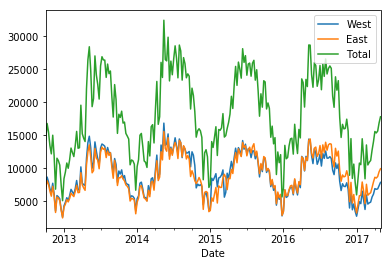

In [2]:
%matplotlib inline
weekly_data=data.resample("W").sum()

weekly_data.plot()


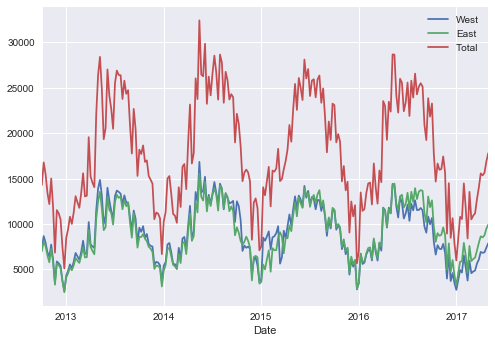

In [3]:
#change style
import matplotlib.pyplot as plt
plt.style.use("seaborn")

data.resample("W").sum().plot()


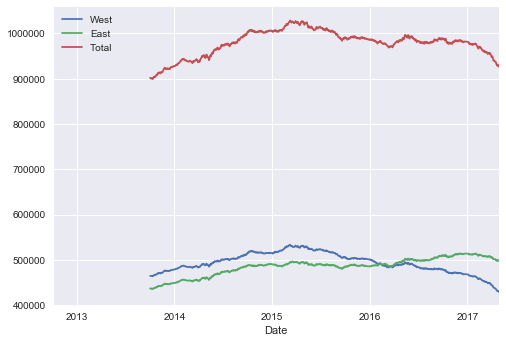

In [4]:
#you have data by the hour, so when you say you want it on a daily basis choose if you want a mean or a sum of what happens in a day.
daily_average=data.resample("D").mean() #.head()
daily_total=data.resample("D").sum() #.head()
daily_total_rolling_sum=data.resample("D").sum().rolling(365).sum() #take that daily total and establish a rolling sum 
daily_total_rolling_sum.plot()


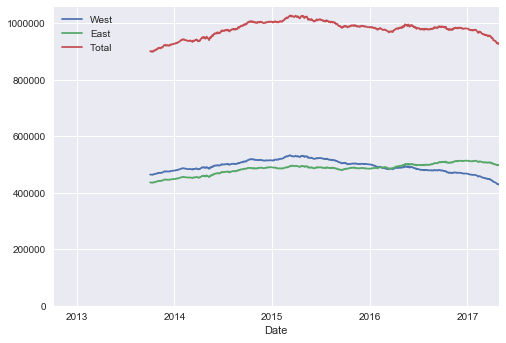

In [5]:
#setting the y axis

ax=data.resample("D").sum().rolling(365).sum().plot() #notice you are setting this plot as a variable ax
ax.set_ylim(0,None); #saying that y should start at 0



In [6]:
print(data.index) #this gives whatever you choose to be your index col
print(data.index.time) #turns that string of time into datetime for the TIME OF DAY ONLY

print(data.groupby(data.index.time).mean().head())

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2017-04-30 14:00:00', '2017-04-30 15:00:00',
               '2017-04-30 16:00:00', '2017-04-30 17:00:00',
               '2017-04-30 18:00:00', '2017-04-30 19:00:00',
               '2017-04-30 20:00:00', '2017-04-30 21:00:00',
               '2017-04-30 22:00:00', '2017-04-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=40104, freq=None)
[datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0) ...,
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]
              West      East      Total
00:00:00  5.427887  6.833034  12.260922
01:00:00  3.012567  3.503890   6.516457
02:00:00  2.236211  2.172062   4.408273
03:

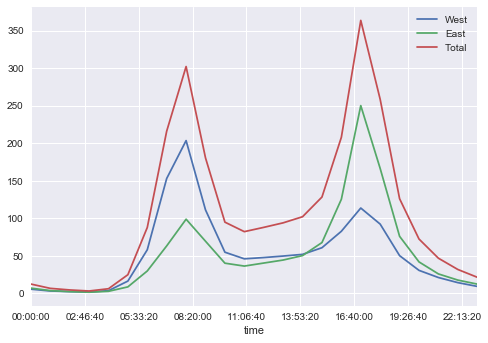

In [7]:
#looking at it intra day
#groupby simply orders them by similar groups. in this case they're grouped based on the time of day
#so data.index.time gets rid of the days part, just keeps time of day. And you group by all those who have the same time of day.
#print(data.groupby(data.index.time).mean().head()) 

data.groupby(data.index.time).mean().plot();

In [8]:
#for pivot tables, think of excel pivot tables where you can sort entire table based on column keys
#in pivot_table mode, your columns setting is no longer "extra data", it's just another way of segmenting
#the data you selected under "values"

pivoted=data.pivot_table(values=["Total"], index=data.index.time)
print(pivoted.iloc[:5])

#you can select your aggregation funciton. By default it's always the mean, but here you set it to sum
#basically you have the sum of all the bike rides by each our of everyday.
pivoted=data.pivot_table(values=["Total"], index=data.index.time,aggfunc=[np.sum])
print(pivoted.iloc[:5])

#the columns give you an extra way to segment your data

pivoted=data.pivot_table("Total", index=data.index.time, columns=data.index.date)
print(pivoted.iloc[:5,:5])

#when you plot it, you can think as your index as what's on your X

              Total
00:00:00  12.260922
01:00:00   6.516457
02:00:00   4.408273
03:00:00   2.998205
04:00:00   5.989826
              sum
            Total
00:00:00  20488.0
01:00:00  10889.0
02:00:00   7353.0
03:00:00   5010.0
04:00:00  10009.0
          2012-10-03  2012-10-04  2012-10-05  2012-10-06  2012-10-07
00:00:00        13.0        18.0        11.0        15.0        11.0
01:00:00        10.0         3.0         8.0        15.0        17.0
02:00:00         2.0         9.0         7.0         9.0         3.0
03:00:00         5.0         3.0         4.0         3.0         6.0
04:00:00         7.0         8.0         9.0         5.0         3.0


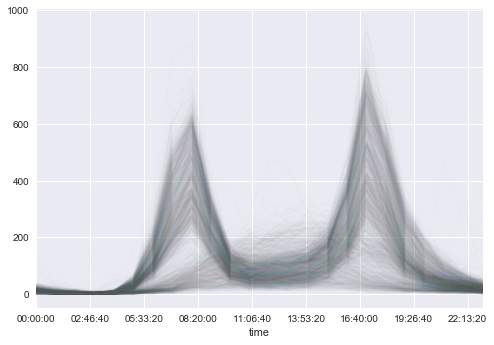

In [9]:
pivoted.plot(legend=False,alpha=0.01) #takes a while because you have a line for each day of the day

#so you can see how this would have been different from simply plotting the original data
#where each day is one after the other. here each day is it's own entire line
#plot() will plot each column, here the number of columns is the number of days


In [10]:
#you'll notice that most of there's some noise in middle, but most of the time
# the traffic happens during commute times